## Import Packages

In [638]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
from sklearn.model_selection import GridSearchCV

## Import Datasets

In [639]:
train = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\MBAN Semester 2\Data Science 2\train.csv", sep =";")
test = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\MBAN Semester 2\Data Science 2\test.csv", sep =";")

## Overview of the training dataset

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [640]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [641]:
train.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [642]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


There are no null values in any of the columns

In [643]:
train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Data Cleaning

Check for Duplicates

In [644]:
train.shape

(45211, 17)

In [645]:
train.drop_duplicates(inplace = True)

In this dataset there are no duplicates as the shape does not change

In [646]:
train.shape

(45211, 17)

In [647]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Univariate Analysis

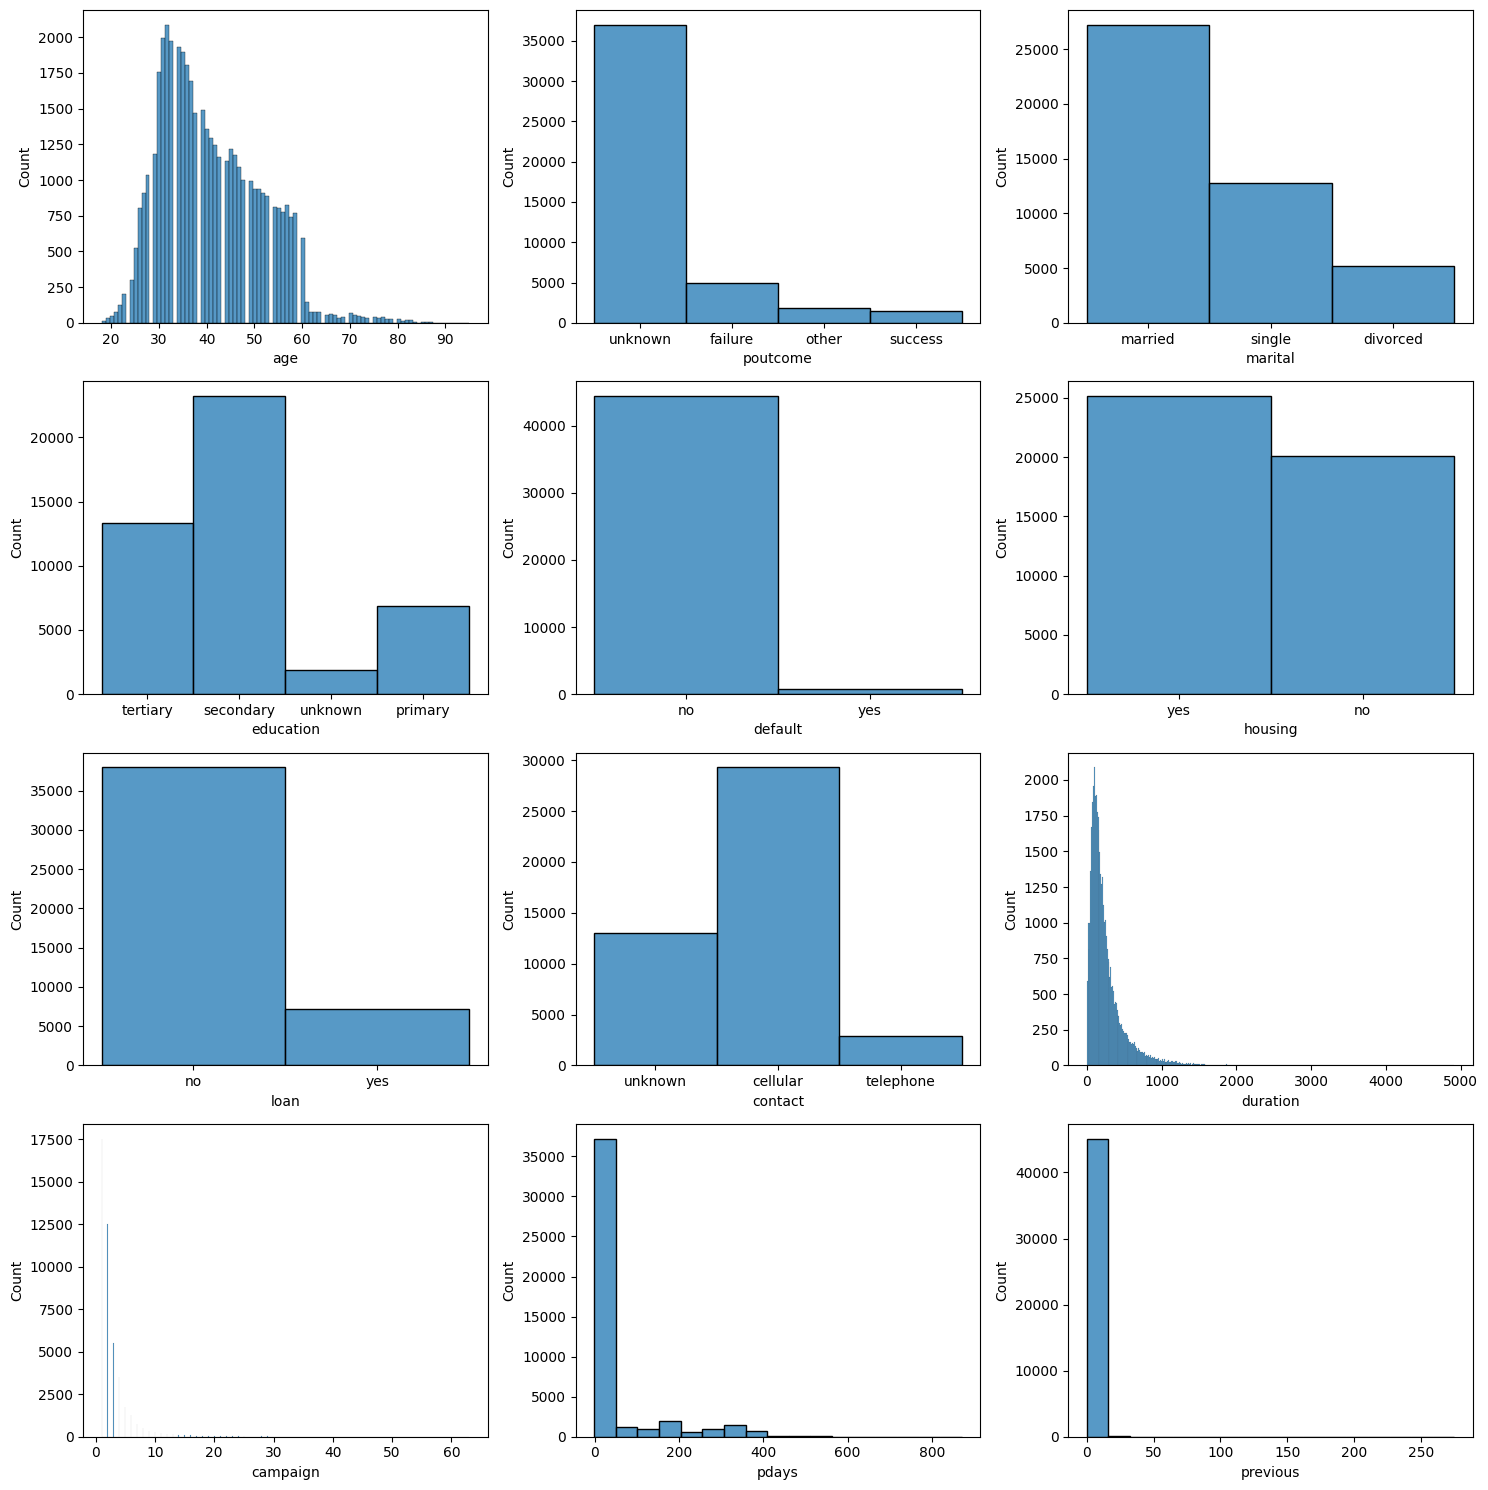

In [648]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(15, 15))

sns.histplot(x=train['age'], ax=ax1)
sns.histplot(x=train['poutcome'], ax=ax2)
sns.histplot(x=train['marital'], ax=ax3)
sns.histplot(x=train['education'], ax=ax4)
sns.histplot(x=train['default'], ax=ax5)
sns.histplot(x=train['housing'], ax=ax6) 
sns.histplot(x=train['loan'], ax=ax7)
sns.histplot(x=train['contact'], ax=ax8)
sns.histplot(x=train['duration'], ax=ax9) 
sns.histplot(x=train['campaign'], ax=ax10)
sns.histplot(x=train['pdays'], ax=ax11)
sns.histplot(x=train['previous'], ax=ax12) 

plt.tight_layout()
plt.show()

most people in this dataset are below the age of 60, are married, have at least secondary education, does not have credit in default, does not have a personal loan, and has the contact type cellular

There seems to be a farily even split between if the person has a house loan

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

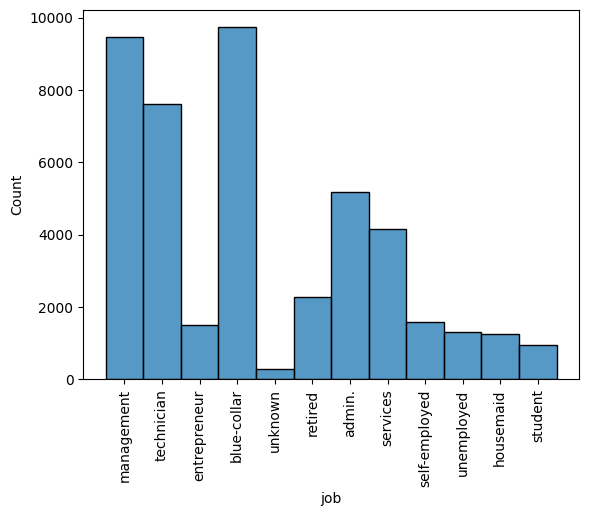

In [649]:
sns.histplot(x = train['job'])
plt.xticks(rotation=90)

Management, technician, and blue-collar job type are the most common within this dataset 

poutcome, contact, education, and job have unknown values

the poutcome unknown values can be attributed to there being no previous contact and these values make up most of the dataset, for that reason we will leave these as unknown. The contact unknown values could be described through any other form of contact other than cellular or telephone like maybe work phone. For that reason we will also leave these as unknown. 

We will look further into the unknowns in job and education later on

In [650]:
train[train['previous'] <= 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [651]:
train[train['poutcome'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


Most of the contacts are new and this is the first time they are being reached out to. Because of this the previous number of calls is 0 and the past outcome is unknown 

### Removing Unknowns

Lets take a look to see if a majority of the dataset is taken up by unknown values in education and job or is it small enough for us to remove them

In [652]:
train.shape

(45211, 17)

In [653]:
train[(train['job'] == 'unknown') | (train['education'] == 'unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
16,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,46,technician,married,unknown,no,3308,no,no,cellular,27,oct,171,1,91,2,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45150,65,management,married,unknown,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no


Since these unknown values only take up 4.46% (2018/45211 = 0.0446) of the data, it is ok to remove these from the dataset

In [654]:
train.drop(train[(train['job'] == 'unknown') | (train['education'] == 'unknown')].index, inplace=True)

In [655]:
train[(train['job'] == 'unknown') | (train['education'] == 'unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


### Univariate Analysis Conclusion

1. There were a lot of unknown values in the job and education columns that could be removed as they took up less than 10% of the data and were the only variables that needed to be removed.
2. There are also unknown values in pcontact and contact. These can be attributed to there being no previous contact and the contact being through another channel other than cellular and telephone
3. the age variable has a steep decline in numbers past 60
4. most people do not have credit in default or a personal loan
5. There is an even split among people that have housing loans
6. most people in this dataset are married
7. pdays and previous have an overwhelming amount of people with a value of 0

With this in mind we will move onto Bivariate analysis

## Bivariate Analysis

### Continuous Variables

In [656]:
col_boolean = ['default','housing','loan','y']

In [657]:
for i in col_boolean:
    train[i] = train[i].apply(lambda x: 1 if x == 'yes' else 0)

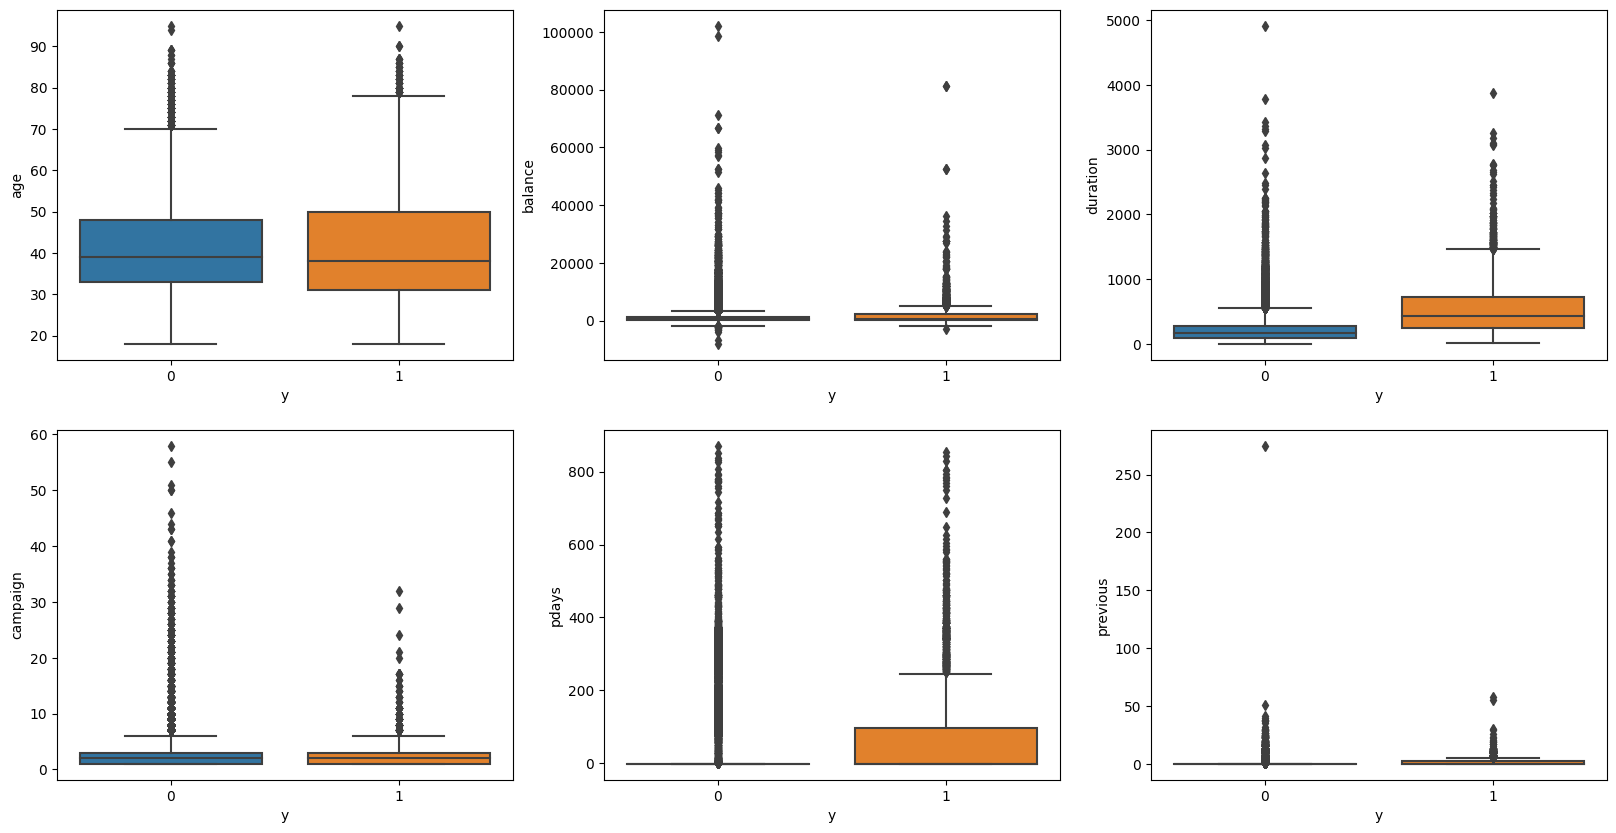

In [658]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(x = 'y', y = 'age', data = train, ax=ax1)
sns.boxplot(x = 'y', y = 'balance', data = train, ax=ax2)
sns.boxplot(x = 'y', y = 'duration', data = train, ax=ax3)
sns.boxplot(x = 'y', y = 'campaign', data = train, ax=ax4)
sns.boxplot(x = 'y', y = 'pdays', data = train, ax=ax5)
sns.boxplot(x = 'y', y = 'previous', data = train, ax=ax6)

plt.show()

### Conclusions for Continuous Variables

1. age, balance, campaign, and previous do not seem to have a large difference on impact on whether or not the client subscribed to a term deposit
2. duration seems to have a large impact with the longer duration seeming to lead to a higher chance of conversion
3. pdays also has a visible difference, the more days that passed by after the client was contacted, the higher the chance of conversion

### Categorical Variables

I will add an index to make the process of bivariate analysis easier

In [659]:
train['index'] = train.index + 1

1. students seem the most likely to subscribe followed by retired despite these groups having some of the smallest overall populations
3. People of all other jobs seem to have a fairly even group that subscribed
4. all marital statuses have between a 10-20% group that converted. None of these really stick out
5. people with tertiary level of education seem to have more people subscribed than any other group. Secondary and primary have around a 10% group that subscribed

In [660]:
for i in ['job', 'marital','education']:
    print(train.groupby([i,'y'])['index'].count().unstack())
    print('---------------------------------------------')

y                 0     1
job                      
admin.         4387   613
blue-collar    8603   675
entrepreneur   1295   116
housemaid      1090   105
management     7963  1253
retired        1659   486
self-employed  1358   182
services       3654   350
student         549   226
technician     6538   817
unemployed     1076   198
---------------------------------------------
y             0     1
marital              
divorced   4430   598
married   23343  2603
single    10399  1820
---------------------------------------------
y              0     1
education             
primary     6212   588
secondary  20690  2441
tertiary   11270  1992
---------------------------------------------


1. if someone does not have credit in default they are more likely to subscribe
2. if someone does not have a housing loan they are more likely to subscribe
3. if someone does not have a personal loan they are more likely to subscribe

In [661]:
for i in ['default', 'housing', 'loan']:
    print(train.groupby([i,'y'])['index'].count().unstack())
    print('---------------------------------------------')

y            0     1
default             
0        37438  4973
1          734    48
---------------------------------------------
y            0     1
housing             
0        15754  3147
1        22418  1874
---------------------------------------------
y         0     1
loan             
0     31538  4548
1      6634   473
---------------------------------------------


1. It looks as if some months are much better than others but I think this is less because of which month it is and more attributed to there being an overall lower number of calls. This could be because if you can spend more time with someone they are more likely to subscribe

In [662]:
for i in ['month']:
    print(train.groupby([i,'y'])['index'].count().unstack())
    print('---------------------------------------------')

y          0    1
month            
apr     2277  543
aug     5378  659
dec      107   93
feb     2115  418
jan     1186  132
jul     6015  586
jun     4457  523
mar      207  241
may    12304  888
nov     3452  390
oct      393  297
sep      281  251
---------------------------------------------


1. contact through cellular and telephone seems more effective than the unknown methods
2. if there was success in the past with someone then there is a high chance you will have success again. These clients should be prioritized
3. the more contacts performed prior to this campaign seems to have a positive impact on the conversion of this campaign

In [663]:
for i in ['contact', 'poutcome', 'previous']:
    print(train.groupby([i,'y'])['index'].count().unstack())
    print('---------------------------------------------')

y              0     1
contact               
cellular   24050  4163
telephone   2344   350
unknown    11778   508
---------------------------------------------
y             0     1
poutcome             
failure    4122   587
other      1481   293
success     507   917
unknown   32062  3224
---------------------------------------------
y               0       1
previous                 
0         32059.0  3222.0
1          2113.0   538.0
2          1575.0   429.0
3           812.0   284.0
4           527.0   166.0
5           328.0   115.0
6           186.0    82.0
7           146.0    49.0
8            89.0    38.0
9            66.0    22.0
10           38.0    25.0
11           47.0    13.0
12           33.0     9.0
13           27.0     9.0
14           14.0     5.0
15           19.0     1.0
16           13.0     NaN
17           12.0     3.0
18            6.0     NaN
19            9.0     2.0
20            7.0     1.0
21            3.0     1.0
22            5.0     1.0
23         

## Feature Engineering

### Binning

I decided to split by age range and put people into bins of 10 years other than over 60, as we saw earlier there was a huge drop off of people after 60 so I decided to combine all those into one group

In [664]:
def age_group(age):
    if age >= 18 and age <= 29:
        return '18-29'
    elif age >= 31 and age <= 39:
        return '31-39'
    elif age >= 41 and age <= 49:
        return '41-49'
    elif age >= 51 and age <= 59:
        return '51-59'
    elif age >= 60:
        return '60+'

In [665]:
train['age_group'] = train.apply(lambda x: age_group(x['age']), axis=1)

I decided to split balance into four groups, the first was anyone with a negative value, this groups contained 3634 entries. After that I wanted to split the remaining people into three fairly even groups. To do this I split them based on balances between 0 and 300, 300 and 1000, and 1000+. This left the groups with 11185, 11050, and 13909 values respectively. 

In [666]:
train[train['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index,age_group
25,44,admin.,married,secondary,0,-372,1,0,unknown,5,may,172,1,-1,0,unknown,0,26,41-49
28,46,management,single,secondary,0,-246,1,0,unknown,5,may,255,2,-1,0,unknown,0,29,41-49
36,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,may,365,1,-1,0,unknown,0,37,18-29
37,53,technician,married,secondary,0,-3,0,0,unknown,5,may,1666,1,-1,0,unknown,0,38,51-59
45,36,admin.,single,primary,0,-171,1,0,unknown,5,may,242,1,-1,0,unknown,0,46,31-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,0,-205,0,0,cellular,1,sep,481,1,579,1,failure,1,44627,31-39
44629,28,blue-collar,single,secondary,0,-46,1,0,cellular,1,sep,199,1,92,14,success,1,44630,18-29
44836,33,blue-collar,married,primary,0,-195,0,0,unknown,20,sep,9,1,-1,0,unknown,0,44837,31-39
44908,48,management,divorced,tertiary,0,-130,1,0,cellular,29,sep,110,2,61,9,failure,0,44909,41-49


In [667]:
train[(train['balance'] > 0) & (train['balance'] < 300)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index,age_group
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,2,41-49
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,3,31-39
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0,6,31-39
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0,8,41-49
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0,9,51-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,25,services,single,secondary,0,199,0,0,cellular,16,nov,173,1,92,5,failure,0,45190,18-29
45190,32,blue-collar,married,secondary,0,136,0,0,cellular,16,nov,206,1,188,3,success,1,45191,31-39
45193,28,self-employed,single,tertiary,0,159,0,0,cellular,16,nov,449,2,33,4,success,1,45194,18-29
45194,59,management,married,tertiary,0,138,1,1,cellular,16,nov,162,2,187,5,failure,0,45195,51-59


In [668]:
train[(train['balance'] > 300) & (train['balance'] < 1000)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index,age_group
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0,7,18-29
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0,10,41-49
11,29,admin.,single,secondary,0,390,1,0,unknown,5,may,137,1,-1,0,unknown,0,12,18-29
20,28,blue-collar,married,secondary,0,723,1,1,unknown,5,may,262,1,-1,0,unknown,0,21,18-29
21,56,management,married,tertiary,0,779,1,0,unknown,5,may,164,1,-1,0,unknown,0,22,51-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,management,married,tertiary,0,583,0,0,cellular,17,nov,226,1,184,4,success,1,45202,51-59
45202,34,admin.,single,secondary,0,557,0,0,cellular,17,nov,224,1,-1,0,unknown,1,45203,31-39
45205,25,technician,single,secondary,0,505,0,1,cellular,17,nov,386,2,-1,0,unknown,1,45206,18-29
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1,45207,51-59


In [669]:
train[(train['balance'] > 1000)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,index,age_group
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,1,51-59
34,51,management,married,tertiary,0,10635,1,0,unknown,5,may,336,1,-1,0,unknown,0,35,51-59
40,44,services,divorced,secondary,0,2586,1,0,unknown,5,may,160,1,-1,0,unknown,0,41,41-49
50,54,blue-collar,married,secondary,0,1291,1,0,unknown,5,may,266,1,-1,0,unknown,0,51,51-59
65,51,management,married,tertiary,0,6530,1,0,unknown,5,may,91,1,-1,0,unknown,0,66,51-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,0,1475,1,0,cellular,16,nov,1166,3,530,12,other,0,45200,31-39
45204,73,retired,married,secondary,0,2850,0,0,cellular,17,nov,300,1,40,8,failure,1,45205,60+
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1,45208,60+
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,45209,60+


In [670]:
def bal_group(balance):
    if balance < 0:
        return 'negative'
    elif balance > 0 and balance < 300:
        return 'low'
    elif balance > 300 and balance < 1000:
        return 'mid'
    elif balance > 1000:
        return 'high'

In [671]:
train['bal_group'] = train.apply(lambda x: bal_group(x['balance']), axis=1)

1. The largest group of people is people ages 31-39. Howver this group is one of the least likely to subscribe
5. The most likely to subscribe is people 60+ followed by people between 18 and 29

In [672]:
for i in ['age_group']:
    print(train.groupby([i,'y'])['index'].count().unstack())
    print('---------------------------------------------')

y              0     1
age_group             
18-29       4182   876
31-39      14224  1644
41-49       8861   890
51-59       6303   667
60+         1070   550
---------------------------------------------


1. People with a high balance are most likely to subscribe
2. People with a negative balance are the least likely to subscribe

In [673]:
for i in ['bal_group']:
    print(train.groupby([i,'y'])['index'].count().unstack())
    print('---------------------------------------------')

y              0     1
bal_group             
high       11791  2118
low        10117  1068
mid         9715  1335
negative    3427   207
---------------------------------------------


## Preprocessing

In [674]:
drop_columns = ['index', 'age_group', 'bal_group']
train = train.drop(drop_columns, axis=1)

In [675]:
y = train['y']
X = train.drop('y', axis=1)

In [676]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [677]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

In [678]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline Models

In [679]:
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()

In [680]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg
}

In [681]:
results = {}

In [682]:
for name, clf in classifiers.items():
    start_time = time.time()
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', clf)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.639706  0.266055  0.375810  0.899641  2.176178
Logistic Regression   0.644860  0.351682  0.455145  0.904387  0.748996


In [683]:
warnings.filterwarnings('ignore', category=UserWarning)

In [684]:
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
}

tuned_results = {}

for name, clf in classifiers.items():
    start_time = time.time()
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)

                                         Best Params Precision    Recall   
K-Nearest Neighbors  {'classifier__n_neighbors': 20}  0.636816  0.260958  \
Logistic Regression           {'classifier__C': 0.1}   0.64313  0.343527   

                     F1-Score   Time (s)  
K-Nearest Neighbors   0.37021  51.269075  
Logistic Regression  0.447841    6.81948  


## Ensemble Methods

In [685]:
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [686]:
classifiers = {
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [687]:
results = {}

In [688]:
for name, clf in classifiers.items():
    start_time = time.time()
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', clf)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

results_df = pd.DataFrame(results).T
print(results_df)

               Precision    Recall  F1-Score  Accuracy  Time (s)
Random Forest   0.654514  0.384302  0.484265  0.907049  6.421850
AdaBoost        0.635135  0.383282  0.478067  0.904966  3.230327
Bagging         0.627422  0.429154  0.509685  0.906239  3.319154
Voting          0.661795  0.323140  0.434247  0.904387  2.494272


In [689]:
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

tuned_results = {}

for name, clf in classifiers.items():
    start_time = time.time()
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df)


                                                     Best Params Precision   
Random Forest  {'classifier__max_depth': 20, 'classifier__n_e...  0.659926  \
AdaBoost                        {'classifier__n_estimators': 75}  0.642857   
Bagging                         {'classifier__n_estimators': 20}  0.618132   
Voting                            {'classifier__voting': 'hard'}  0.663202   

                 Recall  F1-Score    Time (s)  
Random Forest  0.365953   0.47082  284.910156  
AdaBoost       0.385321  0.481836    36.50236  
Bagging        0.458716  0.526624   46.969968  
Voting         0.325178  0.436389   19.645783  
